<a href="https://colab.research.google.com/github/danielarruda1000/credit_card_churn_prediction/blob/main/credit_card_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [1]:
import numpy as np
import pandas as pd

# Viz lib
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)
pd.set_option("display.float_format", lambda x: "%.5f" % x)

from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    classification_report,
    precision_recall_curve
)

from sklearn.model_selection import (train_test_split,
                                     StratifiedKFold,
                                     cross_val_score)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings("ignore")

### Loading data

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
%cd MyDrive/
%cd MIT DS
%cd Study\ Case

Mounted at /gdrive
/gdrive
/gdrive/MyDrive
/gdrive/MyDrive/MIT DS
/gdrive/MyDrive/MIT DS/Study Case


In [3]:
data = pd.read_csv('BankChurners.csv')

In [4]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.00000,777,11914.00000,1.33500,1144,42,1.62500,0.06100
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.00000,864,7392.00000,1.54100,1291,33,3.71400,0.10500
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.00000,0,3418.00000,2.59400,1887,20,2.33300,0.00000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.00000,2517,796.00000,1.40500,1171,20,2.33300,0.76000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.00000,0,4716.00000,2.17500,816,28,2.50000,0.00000


### Exploring data

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00000,739177606.33366,36903783.45023,708082083.00000,713036770.50000,717926358.00000,773143533.00000,828343083.00000
Customer_Age,10127.00000,46.32596,8.01681,26.00000,41.00000,46.00000,52.00000,73.00000
Dependent_count,10127.00000,2.34620,1.29891,0.00000,1.00000,2.00000,3.00000,5.00000
Months_on_book,10127.00000,35.92841,7.98642,13.00000,31.00000,36.00000,40.00000,56.00000
Total_Relationship_Count,10127.00000,3.81258,1.55441,1.00000,3.00000,4.00000,5.00000,6.00000
Months_Inactive_12_mon,10127.00000,2.34117,1.01062,0.00000,2.00000,2.00000,3.00000,6.00000
Contacts_Count_12_mon,10127.00000,2.45532,1.10623,0.00000,2.00000,2.00000,3.00000,6.00000
Credit_Limit,10127.00000,8631.95370,9088.77665,1438.30000,2555.00000,4549.00000,11067.50000,34516.00000
Total_Revolving_Bal,10127.00000,1162.81406,814.98734,0.00000,359.00000,1276.00000,1784.00000,2517.00000
Avg_Open_To_Buy,10127.00000,7469.13964,9090.68532,3.00000,1324.50000,3474.00000,9859.00000,34516.00000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
data.isnull().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [8]:
for c in data.describe(include='object').columns:
  print(c)
  print(data[c].value_counts(normalize=True),'\n')
  print('----------------------------------------')

Attrition_Flag
Existing Customer   0.83934
Attrited Customer   0.16066
Name: Attrition_Flag, dtype: float64 

----------------------------------------
Gender
F   0.52908
M   0.47092
Name: Gender, dtype: float64 

----------------------------------------
Education_Level
Graduate        0.36338
High School     0.23385
Uneducated      0.17275
College         0.11768
Post-Graduate   0.05994
Doctorate       0.05239
Name: Education_Level, dtype: float64 

----------------------------------------
Marital_Status
Married    0.49979
Single     0.42045
Divorced   0.07976
Name: Marital_Status, dtype: float64 

----------------------------------------
Income_Category
Less than $40K   0.35163
$40K - $60K      0.17676
$80K - $120K     0.15157
$60K - $80K      0.13844
abc              0.10981
$120K +          0.07179
Name: Income_Category, dtype: float64 

----------------------------------------
Card_Category
Blue       0.93177
Silver     0.05480
Gold       0.01145
Platinum   0.00197
Name: Card_Categ

### Pre-Processing

In [9]:
# Dropping Id cliente collumns
data.drop('CLIENTNUM', axis=1, inplace=True)

In [10]:
data['Attrition_Flag'].replace('Existing Customer', 0, inplace=True)
data['Attrition_Flag'].replace('Attrited Customer', 1, inplace=True)

#### Univariate Analysis

In [11]:
def plot_feature(col):
  f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

  sns.boxplot(data[col], ax=ax_box)
  sns.distplot(data[col], ax=ax_dist)
  ax_box.set(xlabel=col)
  plt.show()

In [12]:
num_cols=['Customer_Age',
          'Months_on_book',
          'Credit_Limit',
          'Total_Revolving_Bal',
          'Avg_Open_To_Buy',
          'Total_Trans_Ct',
          'Total_Amt_Chng_Q4_Q1',
          'Total_Trans_Amt',
          'Total_Ct_Chng_Q4_Q1',
          'Avg_Utilization_Ratio']

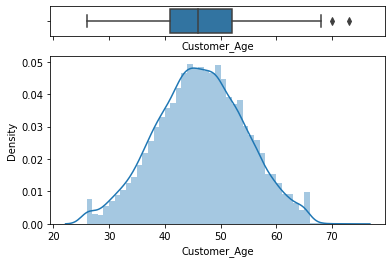

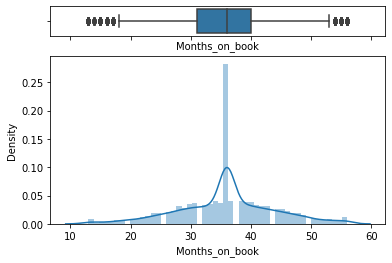

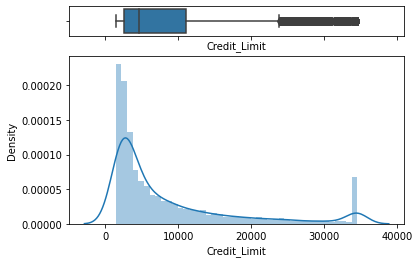

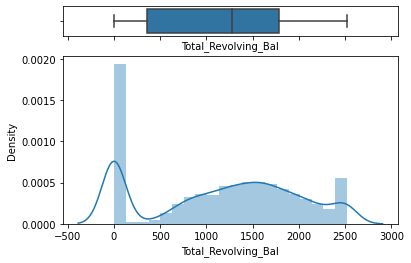

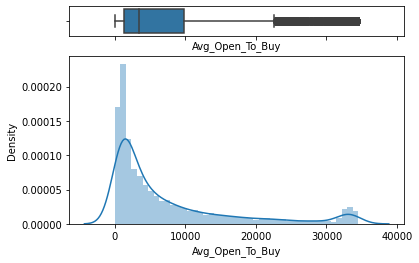

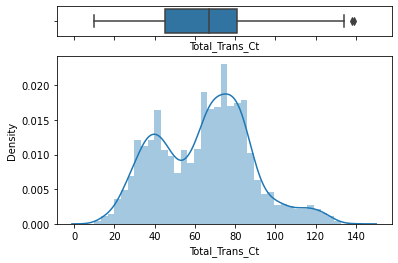

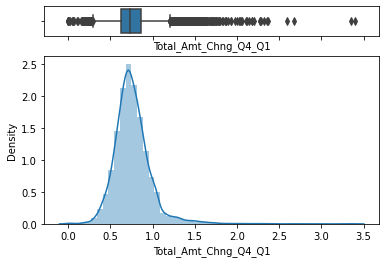

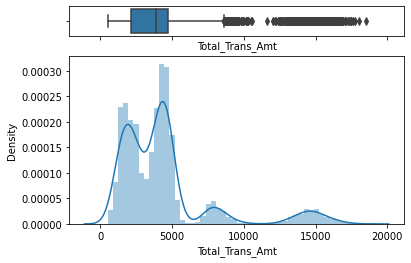

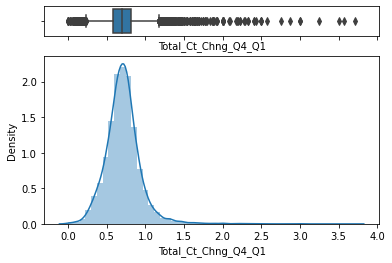

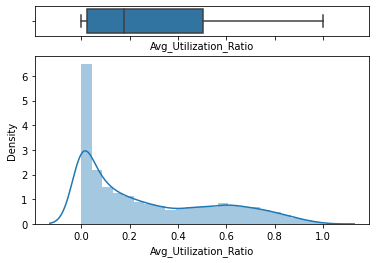

In [13]:
for c in num_cols:
  plot_feature(c)
  print('\n')

#### Bivariate Analysis

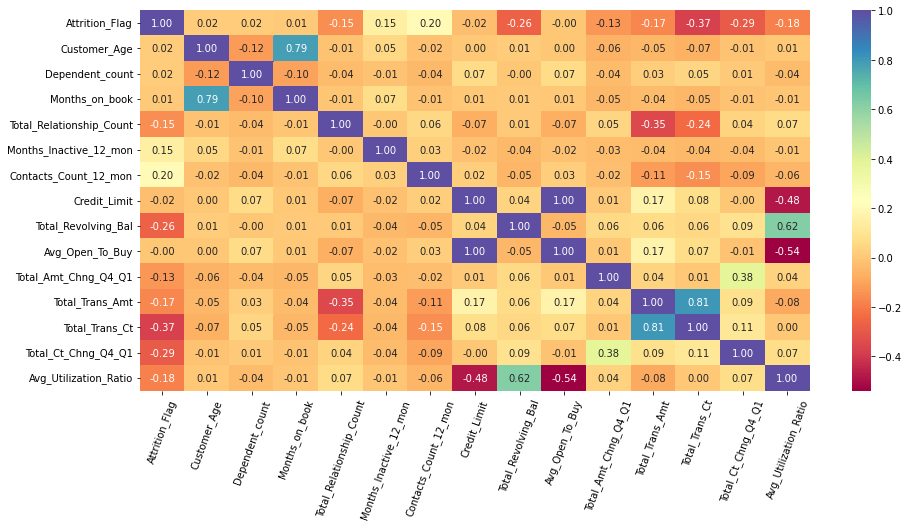

In [14]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmax=1, fmt='.2f',cmap='Spectral')
plt.xticks(rotation=70)
plt.show()

In [15]:
def percentagem_attrition(col):
  (pd.crosstab(data[col], data['Attrition_Flag'], normalize='index')*100).plot(kind='bar', figsize=(8,4), stacked=True)
  plt.title('Attrition Representation for ' + col)
  plt.xticks(rotation=70)
  plt.show()

In [16]:
obj_cols =['Gender',
 'Marital_Status',
 'Education_Level',
 'Income_Category',
 'Card_Category',
 'Contacts_Count_12_mon',
 'Months_Inactive_12_mon',
 'Total_Relationship_Count',
 'Dependent_count']

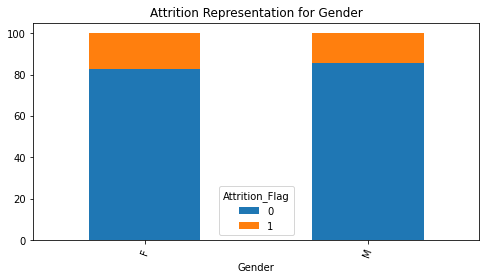

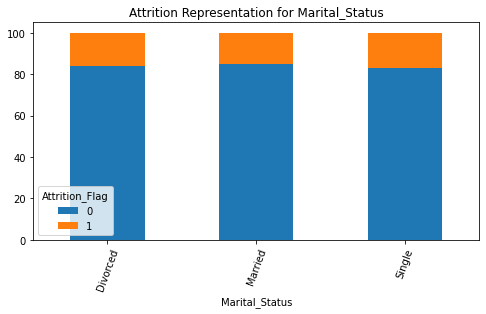

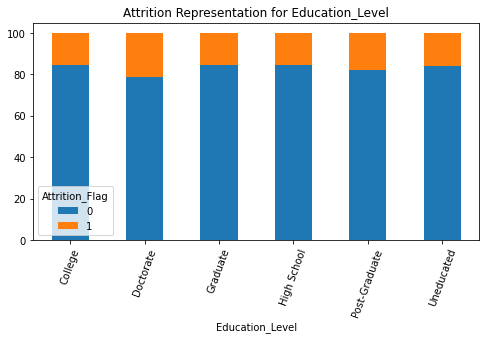

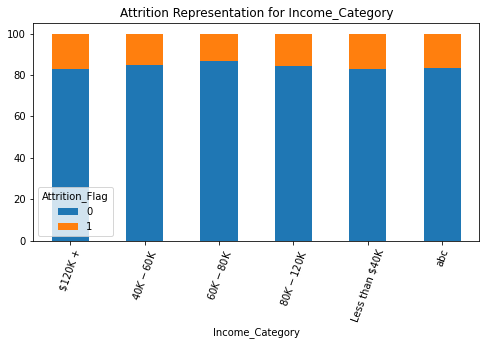

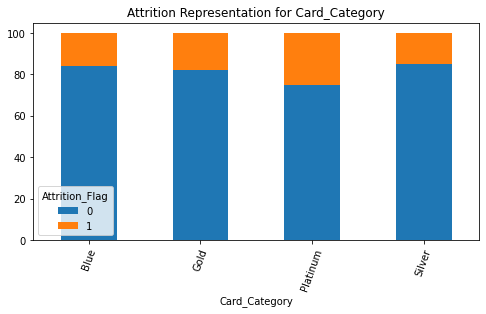

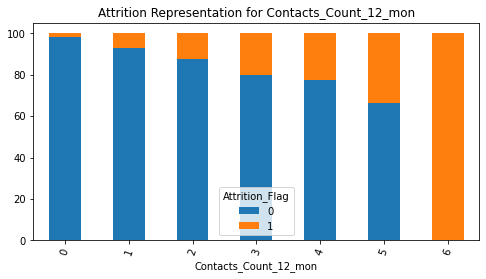

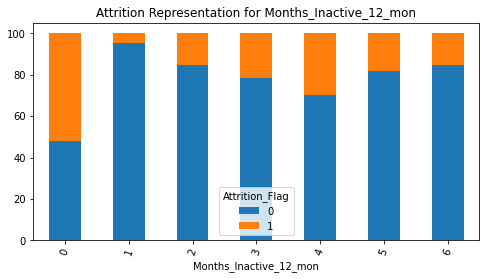

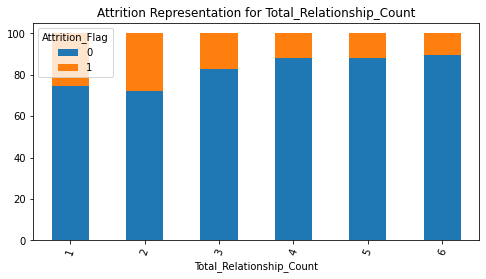

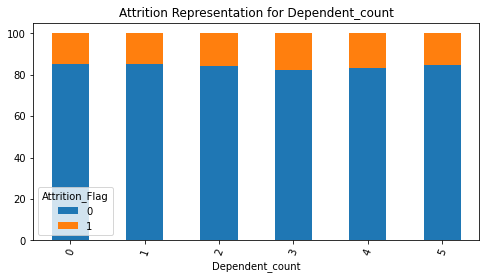

In [17]:
for col in obj_cols:
  percentagem_attrition(col)

#### Handle missing values e categorical feats

In [18]:
data['Income_Category'] = data['Income_Category'].replace('abc', np.nan)

In [19]:
data.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [20]:
imputer = SimpleImputer(strategy='most_frequent')

In [21]:
data[['Education_Level', 'Marital_Status', 'Income_Category']] = imputer.fit_transform(data[['Education_Level', 'Marital_Status', 'Income_Category']])

In [22]:
data.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

#### Split data

In [23]:
X = data.drop('Attrition_Flag', axis=1)
y = data['Attrition_Flag']

In [24]:
y.value_counts(normalize=True)

0   0.83934
1   0.16066
Name: Attrition_Flag, dtype: float64

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1,stratify=y)

In [26]:
y_train.value_counts(normalize=True)

0   0.83931
1   0.16069
Name: Attrition_Flag, dtype: float64

In [27]:
y_test.value_counts(normalize=True)

0   0.83942
1   0.16058
Name: Attrition_Flag, dtype: float64

#### Encoding Categorial Features
###### One hoting enconding strategy

In [28]:
X_train = pd.get_dummies(X_train, drop_first=True)

In [29]:
X_test = pd.get_dummies(X_test, drop_first=True)

### Tranning Models

In [30]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Attrite', 'Attrite'], yticklabels=['Not Attrite', 'Attrite'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

#### Logistic Regression

In [31]:
lg_model = LogisticRegression()

In [32]:
lg_model.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      5949
           1       0.69      0.44      0.53      1139

    accuracy                           0.88      7088
   macro avg       0.79      0.70      0.73      7088
weighted avg       0.87      0.88      0.87      7088



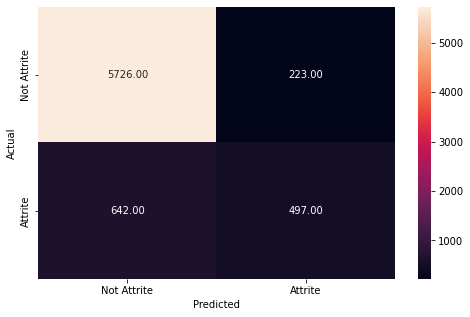

In [33]:
# Performance on Trainning
y_train_pred = lg_model.predict(X_train)
metrics_score(y_train, y_train_pred)

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2551
           1       0.70      0.44      0.54       488

    accuracy                           0.88      3039
   macro avg       0.80      0.70      0.74      3039
weighted avg       0.87      0.88      0.87      3039



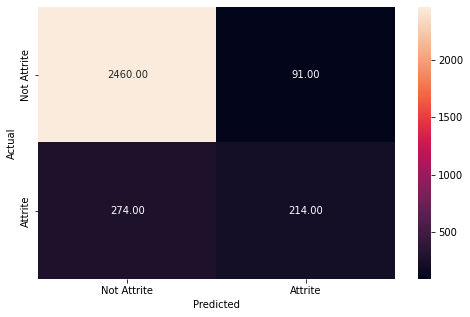

In [34]:
# Performance on Test
y_test_pred = lg_model.predict(X_test)
metrics_score(y_test, y_test_pred)

In [35]:
# Feature Importance

In [37]:
features = X_train.columns
coefs = lg_model.coef_

pd.DataFrame(coefs, columns=features).T.sort_values(0, ascending=False)

,0
Contacts_Count_12_mon,0.31531
Months_Inactive_12_mon,0.24919
Dependent_count,0.20002
Customer_Age,0.11755
Income_Category_Less than $40K,0.05269
Marital_Status_Single,0.04579
Education_Level_Graduate,0.01085
Education_Level_Post-Graduate,0.00870
Education_Level_Doctorate,0.00737
Education_Level_Uneducated,0.00455


In [38]:
# Precision-Recall Curve

In [43]:
y_train_score = lg_model.predict_proba(X_train)
precision_lg, recall_lg, threshold_ls = precision_recall_curve(y_train, y_train_score[:,1])

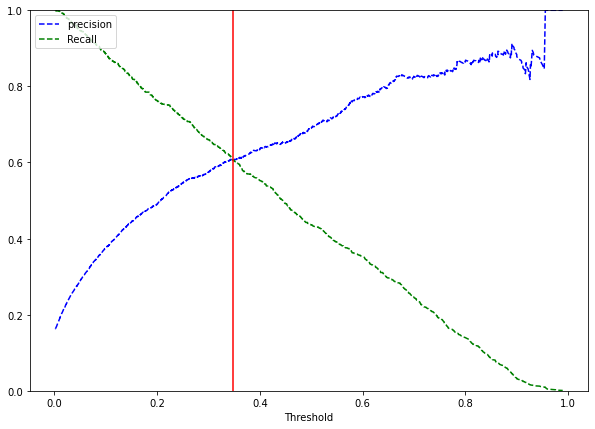

Where Threshold and recall are equal:  0.35


In [54]:
plt.figure(figsize=(10,7))
plt.plot(threshold_ls, precision_lg[:-1], 'b--', label='precision')
plt.plot(threshold_ls, recall_lg[:-1], 'g--', label='Recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])

for i in np.arange(len(threshold_ls)):
  if precision_lg[i]==recall_lg[i]:
    intercect = threshold_ls[i]
plt.axvline(intercect, color='red')
plt.show()

print('Where Threshold and recall are equal: ', round(intercect,2))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      5949
           1       0.61      0.60      0.61      1139

    accuracy                           0.87      7088
   macro avg       0.77      0.76      0.77      7088
weighted avg       0.87      0.87      0.87      7088



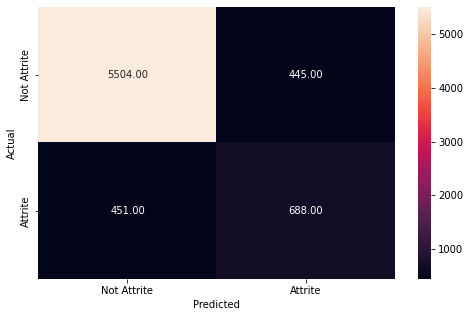

In [55]:
new_optimal_threshold = 0.35
y_pred_train = lg_model.predict_proba(X_train)
metrics_score(y_train, y_pred_train[:,1]>new_optimal_threshold)

In [56]:
## We can see a little improvement with this new Threshold

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      2551
           1       0.62      0.60      0.61       488

    accuracy                           0.88      3039
   macro avg       0.77      0.77      0.77      3039
weighted avg       0.88      0.88      0.88      3039



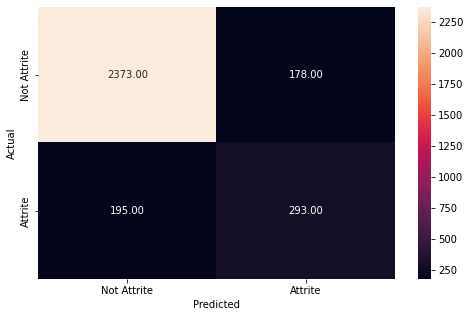

In [57]:
y_pred_test = lg_model.predict_proba(X_test)
metrics_score(y_test, y_pred_test[:,1]>new_optimal_threshold)

### Desicion Tree Model

In [58]:
dt_model = DecisionTreeClassifier(random_state=1, max_depth=8)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5949
           1       0.93      0.92      0.93      1139

    accuracy                           0.98      7088
   macro avg       0.96      0.95      0.96      7088
weighted avg       0.98      0.98      0.98      7088



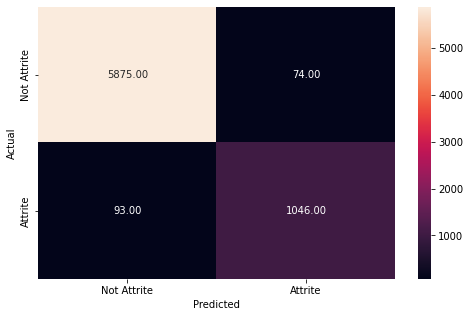

In [60]:
# Trainning performance
y_pred_train = dt_model.predict(X_train)
metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2551
           1       0.82      0.82      0.82       488

    accuracy                           0.94      3039
   macro avg       0.89      0.89      0.89      3039
weighted avg       0.94      0.94      0.94      3039



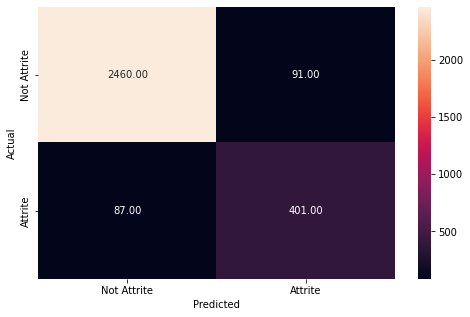

In [61]:
# Test Performance
y_pred_test = dt_model.predict(X_test)
metrics_score(y_test, y_pred_test)

In [66]:
# Plotting Decision Tree

In [73]:
features = list(X_train.columns)

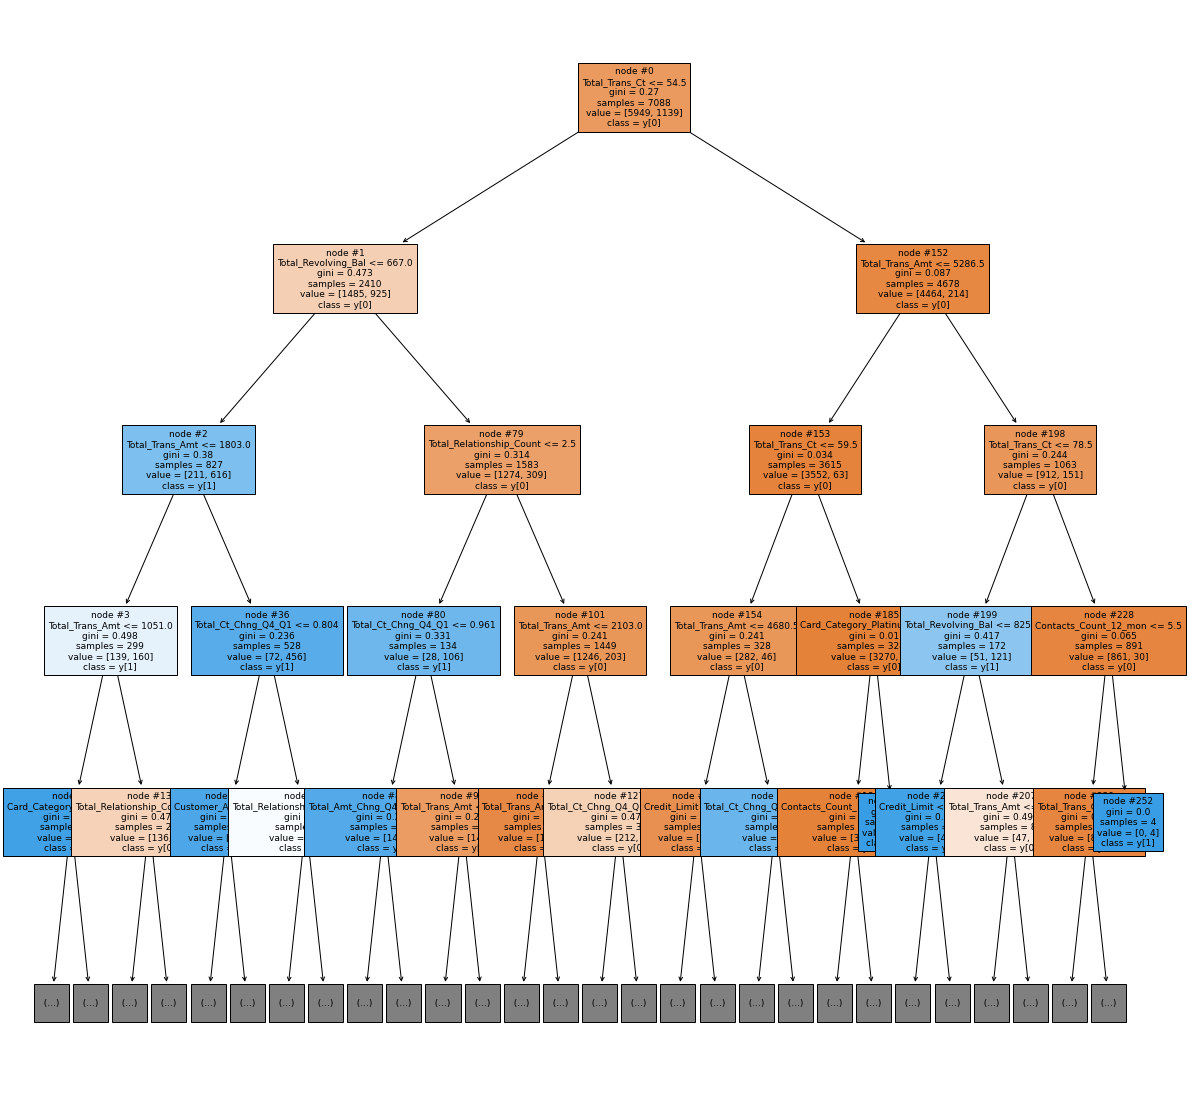

In [75]:
plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(dt_model,feature_names=features,max_depth =4, filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [76]:
# Feature Importance

In [79]:
importances = dt_model.feature_importances_
indices = np.argsort(importances)

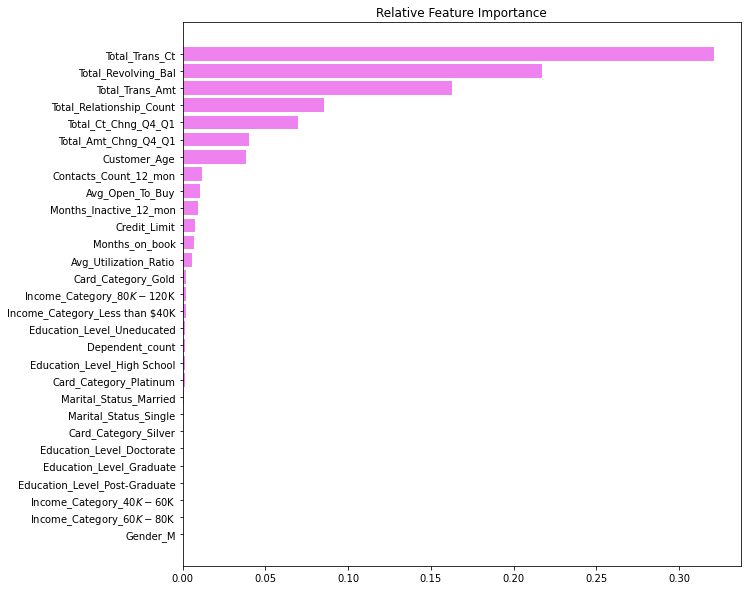

In [88]:
plt.figure(figsize=(10,10))
plt.title('Relative Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.show()